<a href="https://colab.research.google.com/github/Krishnan-Raghavan/Packt/blob/main/StableDiffusionChapter13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install diffusers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 26.2 MB/s eta 0:00:00


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/584 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/520 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.58k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/465 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.22k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/755 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/630 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


  0%|          | 0/50 [00:00<?, ?it/s]

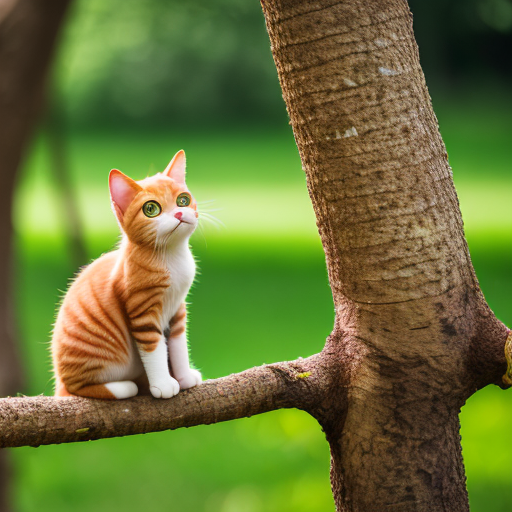

In [2]:
import torch
from diffusers import StableDiffusionPipeline

# load model
text2img_pipe = StableDiffusionPipeline.from_pretrained(
    "stablediffusionapi/deliberate-v2"
    , torch_dtype = torch.float16
).to("cuda:0")

# generate sample image
prompt = """
high resolution photo,best quality, masterpiece, 8k
A cute cat stand on the tree branch, depth of field, detailed body
"""

neg_prompt = """
paintings,ketches, worst quality, low quality, normal quality, lowres,
monochrome, grayscale
"""

image = text2img_pipe(
    prompt = prompt
    , negative_prompt = neg_prompt
    , generator = torch.Generator("cuda").manual_seed(7)
).images[0]
image

In [3]:
!pip install opencv-contrib-python
!pip install controlnet_aux

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.4/202.4 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 58.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 66.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 69.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 91.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.3

In [4]:
from controlnet_aux import CannyDetector
canny = CannyDetector()
image_canny = canny(image, 30, 100)

/usr/local/lib/python3.10/dist-packages/controlnet_aux/mediapipe_face/mediapipe_face_common.py:7: UserWarning: The module 'mediapipe' is not installed. The package will have limited functionality. Please install it using the command: pip install 'mediapipe'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/controlnet_aux/segment_anything/modeling/tiny_vit_sam.py:654: UserWarning: Overwriting tiny_vit_5m_224 in registry with controlnet_aux.segment_anything.modeling.tiny_vit_sam.tiny_vit_5m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
/usr/local/lib/python3.10/dist-packages/controlnet_aux/segment_anything/modeling/tiny_vit_sam.py:654: UserWarning: Overwriting tiny_vit_11m_224 in registry with controlnet_aux.segment_anything.modeling.tiny_vit_sam.tiny_vit_11m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.

In [5]:
from diffusers import ControlNetModel
canny_controlnet = ControlNetModel.from_pretrained(
    'takuma104/control_v11'
    , subfolder='control_v11p_sd15_canny'
    , torch_dtype=torch.float16
)

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


control_v11p_sd15_canny/config.json:   0%|          | 0.00/920 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/723M [00:00<?, ?B/s]

In [6]:
from diffusers import StableDiffusionControlNetImg2ImgPipeline
cn_pipe = StableDiffusionControlNetImg2ImgPipeline.from_pretrained(
    "stablediffusionapi/deliberate-v2"
    , torch_dtype           = torch.float16
    , controlnet            = canny_controlnet
)

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [14]:
prompt = """
high resolution photo,best quality, masterpiece, 8k
A cute dog stand on the tree branch, depth of field, detailed body
"""

neg_prompt = """
paintings,ketches, worst quality, low quality, normal quality, lowres,
monochrome, grayscale
"""
image_from_canny = single_cn_pipe(
    prompt = prompt
    , negative_prompt = neg_prompt
    , image = canny_image
    , generator = torch.Generator("cuda").manual_seed(2)
    , num_inference_steps = 30
    , guidance_scale = 6.0
).images[0]
image_from_canny

NameError: name 'single_cn_pipe' is not defined

scannet.pt:   0%|          | 0.00/291M [00:00<?, ?B/s]

Loading base model ()...Done.
Removing last two layers (global_pool & classifier).


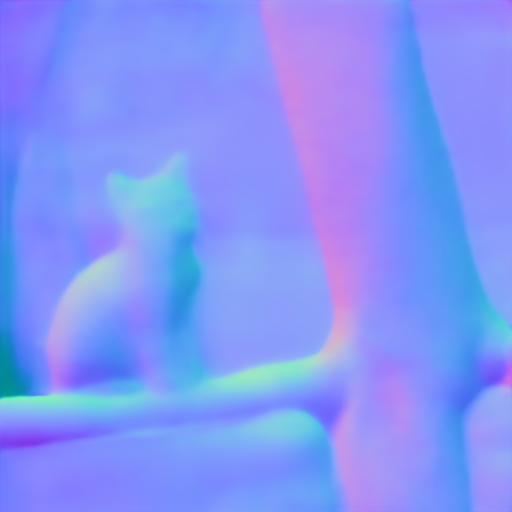

In [15]:
from controlnet_aux import NormalBaeDetector
normal_bae  = NormalBaeDetector.from_pretrained("lllyasviel/Annotators")
image_canny = normal_bae(image)
image_canny

In [16]:
from diffusers import ControlNetModel
canny_controlnet = ControlNetModel.from_pretrained(
    'takuma104/control_v11'
    , subfolder='control_v11p_sd15_canny'
    , torch_dtype=torch.float16
)
bae_controlnet = ControlNetModel.from_pretrained(
    'takuma104/control_v11'
    , subfolder='control_v11p_sd15_normalbae'
    , torch_dtype=torch.float16
)
controlnets = [canny_controlnet, bae_controlnet]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


diffusion_pytorch_model.safetensors:   0%|          | 0.00/723M [00:00<?, ?B/s]

In [17]:
from diffusers import StableDiffusionControlNetPipeline
two_cn_pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "stablediffusionapi/deliberate-v2"
    , torch_dtype           = torch.float16
    , controlnet            = controlnets
).to("cuda")

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


In [21]:
prompt = """
high resolution photo,best quality, masterpiece, 8k
A cute dog on the tree branch, depth of field, detailed body,
"""

neg_prompt = """
paintings,ketches, worst quality, low quality, normal quality, lowres,
monochrome, grayscale
"""
image_from_2cn = two_cn_pipe(
    prompt = prompt
    , image                 = [canny_image,bae_image]
    , controlnet_conditioning_scale = [0.5,0.5]
    , generator             = torch.Generator("cuda").manual_seed(2)
    , num_inference_steps   = 30
    , guidance_scale        = 5.5
).images[0]
image_from_2cn

NameError: name 'canny_image' is not defined

In [ ]:
import torch
from diffusers import StableDiffusionXLPipeline
sdxl_pipe = StableDiffusionXLPipeline.from_pretrained(
    "RunDiffusion/RunDiffusion-XL-Beta"
    , torch_dtype           = torch.float16
    , load_safety_checker   = False
)
sdxl_pipe.watermark = None

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


model_index.json:   0%|          | 0.00/582 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/10.3G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Keyword arguments {'load_safety_checker': False} are not expected by StableDiffusionXLPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [2]:
from diffusers import EulerDiscreteScheduler
prompt = """
full body photo of young man, arms spread
white blank background,
glamour photography,
upper body wears shirt,
wears suit pants,
wears leather shoes
"""
neg_prompt = """
worst quality,low quality, paint, cg, spots, bad hands,
three hands, noise, blur, bad anatomy, low resolution, blur face, bad face
"""
sdxl_pipe.to("cuda")

sdxl_pipe.scheduler = EulerDiscreteScheduler.from_config(sdxl_pipe.scheduler.config)
image = sdxl_pipe(
    prompt              = prompt
    , negative_prompt   = neg_prompt
    , width             = 832
    , height            = 1216
).images[0]
sdxl_pipe.to("cpu")
torch.cuda.empty_cache()
image

NameError: name 'sdxl_pipe' is not defined

In [1]:
from controlnet_aux import OpenposeDetector
open_pose = OpenposeDetector.from_pretrained("lllyasviel/Annotators")
pose = open_pose(image)
pose

/usr/local/lib/python3.10/dist-packages/controlnet_aux/mediapipe_face/mediapipe_face_common.py:7: UserWarning: The module 'mediapipe' is not installed. The package will have limited functionality. Please install it using the command: pip install 'mediapipe'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/controlnet_aux/segment_anything/modeling/tiny_vit_sam.py:654: UserWarning: Overwriting tiny_vit_5m_224 in registry with controlnet_aux.segment_anything.modeling.tiny_vit_sam.tiny_vit_5m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
/usr/local/lib/python3.10/dist-packages/controlnet_aux/segment_anything/modeling/tiny_vit_sam.py:654: UserWarning: Overwriting tiny_vit_11m_224 in registry with controlnet_aux.segment_anything.modeling.tiny_vit_sam.tiny_vit_11m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.

KeyboardInterrupt: 

In [ ]:
from diffusers import StableDiffusionXLControlNetPipeline
from diffusers import ControlNetModel
sdxl_pose_controlnet = ControlNetModel.from_pretrained(
    "thibaud/controlnet-openpose-sdxl-1.0"
    , torch_dtype=torch.float16
)

sdxl_cn_pipe = StableDiffusionXLControlNetPipeline.from_pretrained(
    "RunDiffusion/RunDiffusion-XL-Beta"
    , torch_dtype           = torch.float16
    , load_safety_checker   = False
    , add_watermarker       = False
    , controlnet            = sdxl_pose_controlnet
)
sdxl_cn_pipe.watermark = None

In [ ]:
from diffusers import EulerDiscreteScheduler
prompt = """
full body photo of young woman, arms spread
white blank background,
glamour photography,
wear sunglass,
upper body wears shirt,
wears suit pants,
wears leather shoes
"""
neg_prompt = """
worst quality,low quality, paint, cg, spots, bad hands,
three hands, noise, blur, bad anatomy, low resolution,
blur face, bad face
"""
sdxl_cn_pipe.to("cuda")

sdxl_cn_pipe.scheduler = EulerDiscreteScheduler.from_config(sdxl_cn_pipe.scheduler.config)
generator = torch.Generator("cuda").manual_seed(2)

image = sdxl_cn_pipe(
    prompt              = prompt
    , negative_prompt   = neg_prompt
    , width             = 832
    , height            = 1216
    , image             = pose
    , generator         = generator
    , controlnet_conditioning_scale = 0.5
    , num_inference_steps = 30
    , guidance_scale    = 6.0
).images[0]
sdxl_cn_pipe.to("cpu")
torch.cuda.empty_cache()
image